<a href="https://colab.research.google.com/github/yaschrist/DataScience/blob/main/GraficosPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analise de Vendas

In [9]:
import pandas as pd
pd.read_csv('alucar[1].csv')
alucar = pd.read_csv('alucar[1].csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
print('Linhas e colunas: ', alucar.shape)

Linhas e colunas:  (24, 2)


In [5]:
print ('Quantidade de dados nulos', alucar.isna().sum().sum())

Quantidade de dados nulos 0


In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [9]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [8]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [10]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

<Axes: xlabel='mes', ylabel='vendas'>

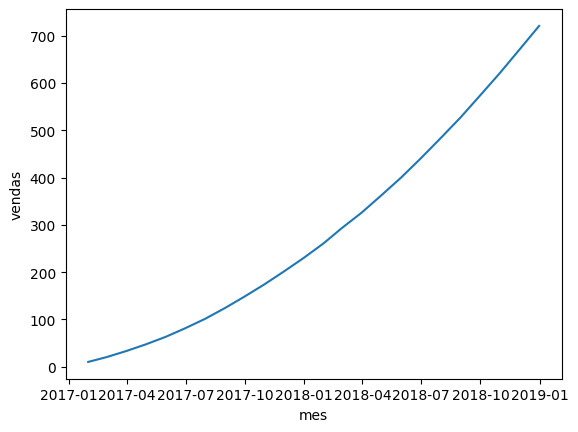

In [10]:
sns.lineplot(x='mes', y='vendas', data=alucar)

In [8]:
sns.set_palette('Accent')

<Axes: xlabel='mes', ylabel='vendas'>

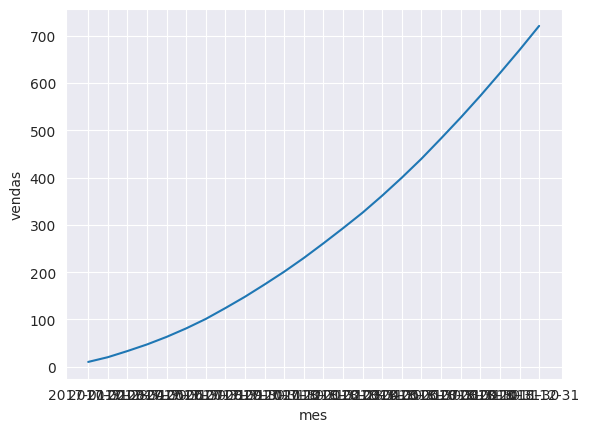

In [7]:
sns.lineplot(x='mes', y='vendas', data=alucar)

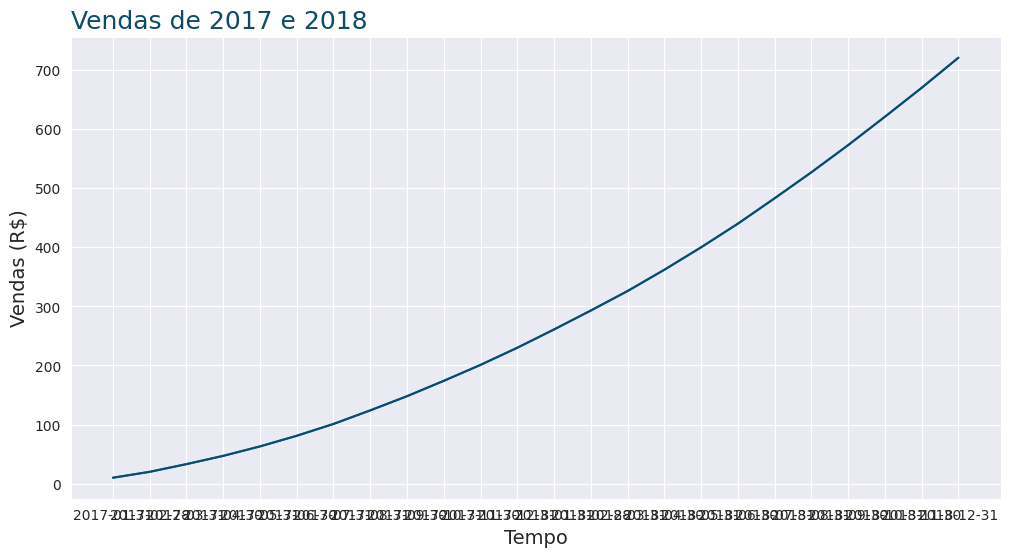

In [15]:
sns.set_style('darkgrid')
sns.lineplot(x='mes', y='vendas', data=alucar)
ax = sns.lineplot(x='mes', y='vendas', data=alucar, color='#0a4c6a')
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas de 2017 e 2018', loc='left', fontsize=18, color='#0a4c6a')
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax=ax #retira o texto superior

In [14]:
alucar['aumento'] = alucar[['vendas']].diff()
alucar.head

<bound method NDFrame.head of            mes  vendas  aumento
0   2017-01-31      10      NaN
1   2017-02-28      20     10.0
2   2017-03-31      33     13.0
3   2017-04-30      47     14.0
4   2017-05-31      63     16.0
5   2017-06-30      81     18.0
6   2017-07-31     101     20.0
7   2017-08-31     124     23.0
8   2017-09-30     148     24.0
9   2017-10-31     174     26.0
10  2017-11-30     201     27.0
11  2017-12-31     230     29.0
12  2018-01-31     261     31.0
13  2018-02-28     293     32.0
14  2018-03-31     326     33.0
15  2018-04-30     362     36.0
16  2018-05-31     400     38.0
17  2018-06-30     440     40.0
18  2018-07-31     483     43.0
19  2018-08-31     527     44.0
20  2018-09-30     573     46.0
21  2018-10-31     621     48.0
22  2018-11-30     670     49.0
23  2018-12-31     721     51.0>

In [4]:
#definindo função plotar
def plotar (titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax


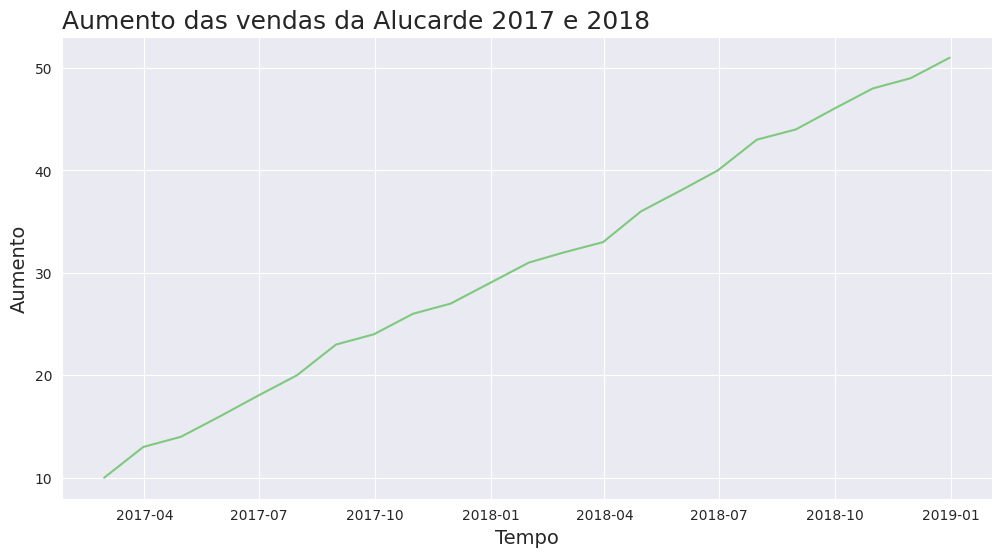

In [15]:
plotar ('Aumento das vendas da Alucarde 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

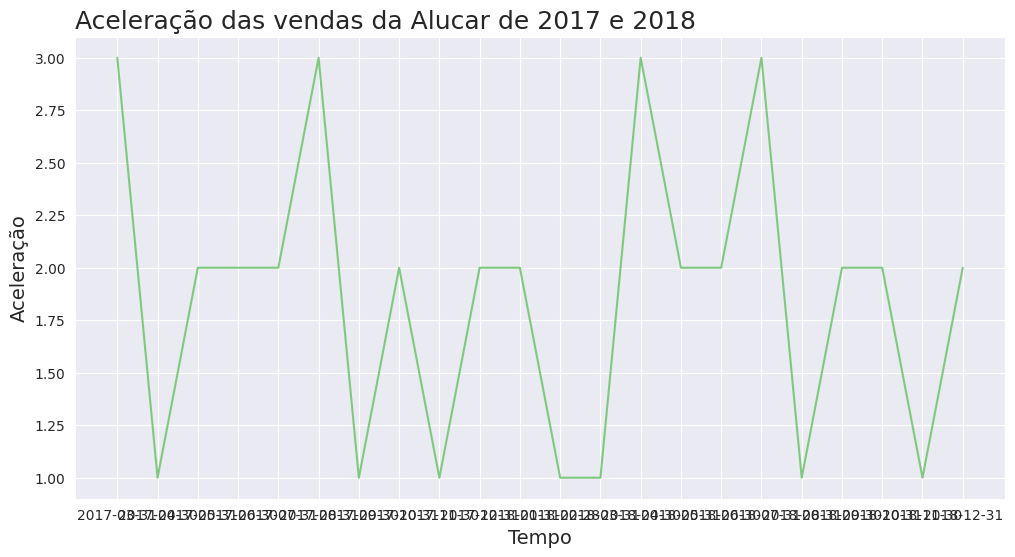

In [18]:
alucar['aceleracao'] = alucar['aumento'].diff()
plotar ('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes','aceleracao', alucar)

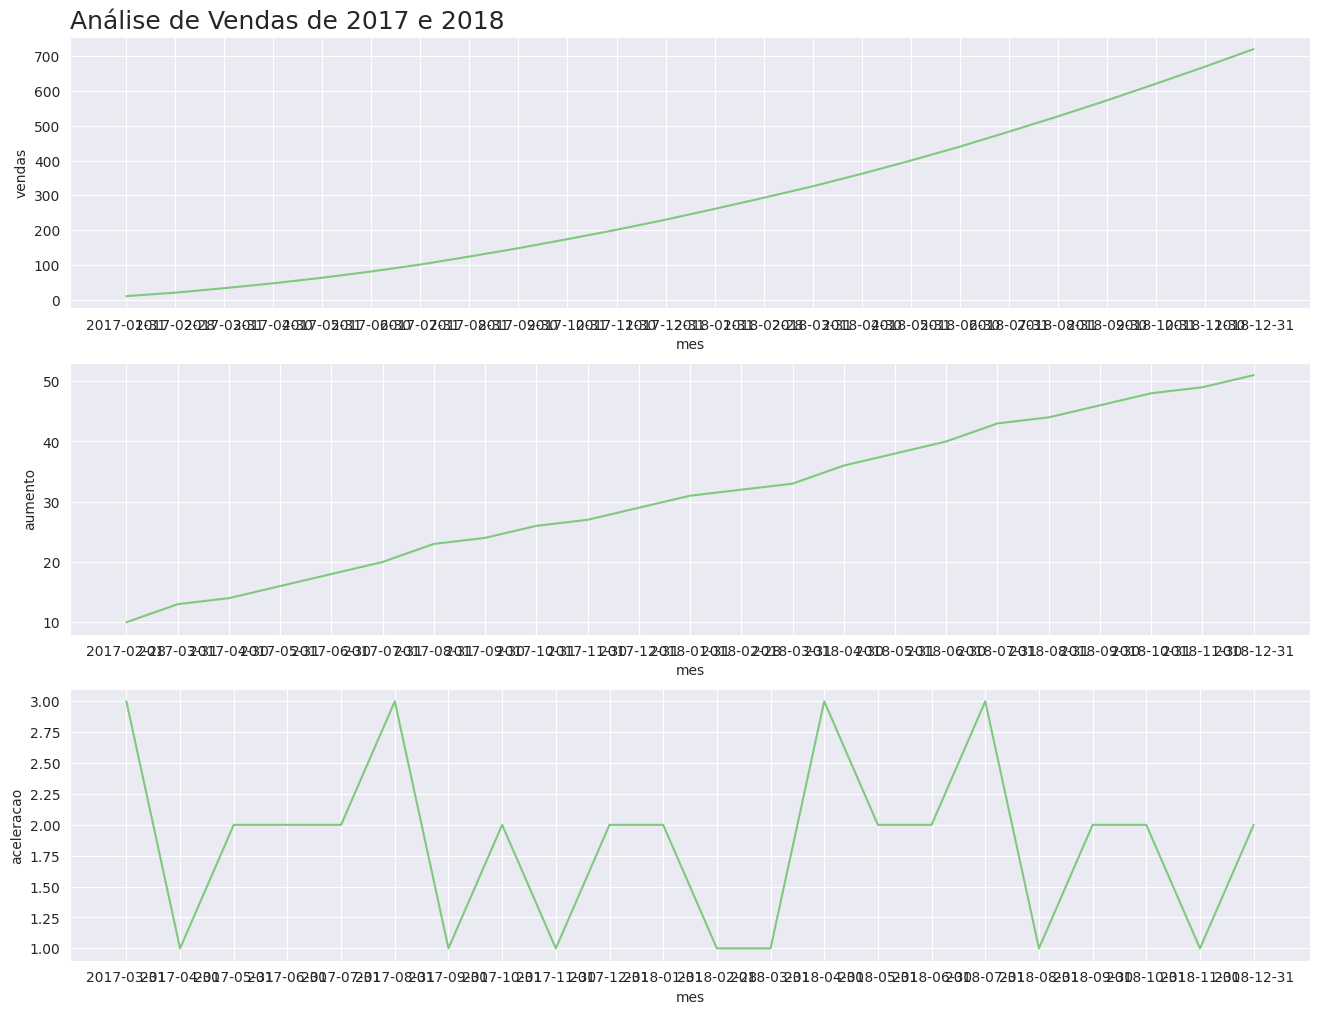

In [19]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3, 1, 1) #dividir/especificar qual plt eu quero
ax.set_title('Análise de Vendas de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax


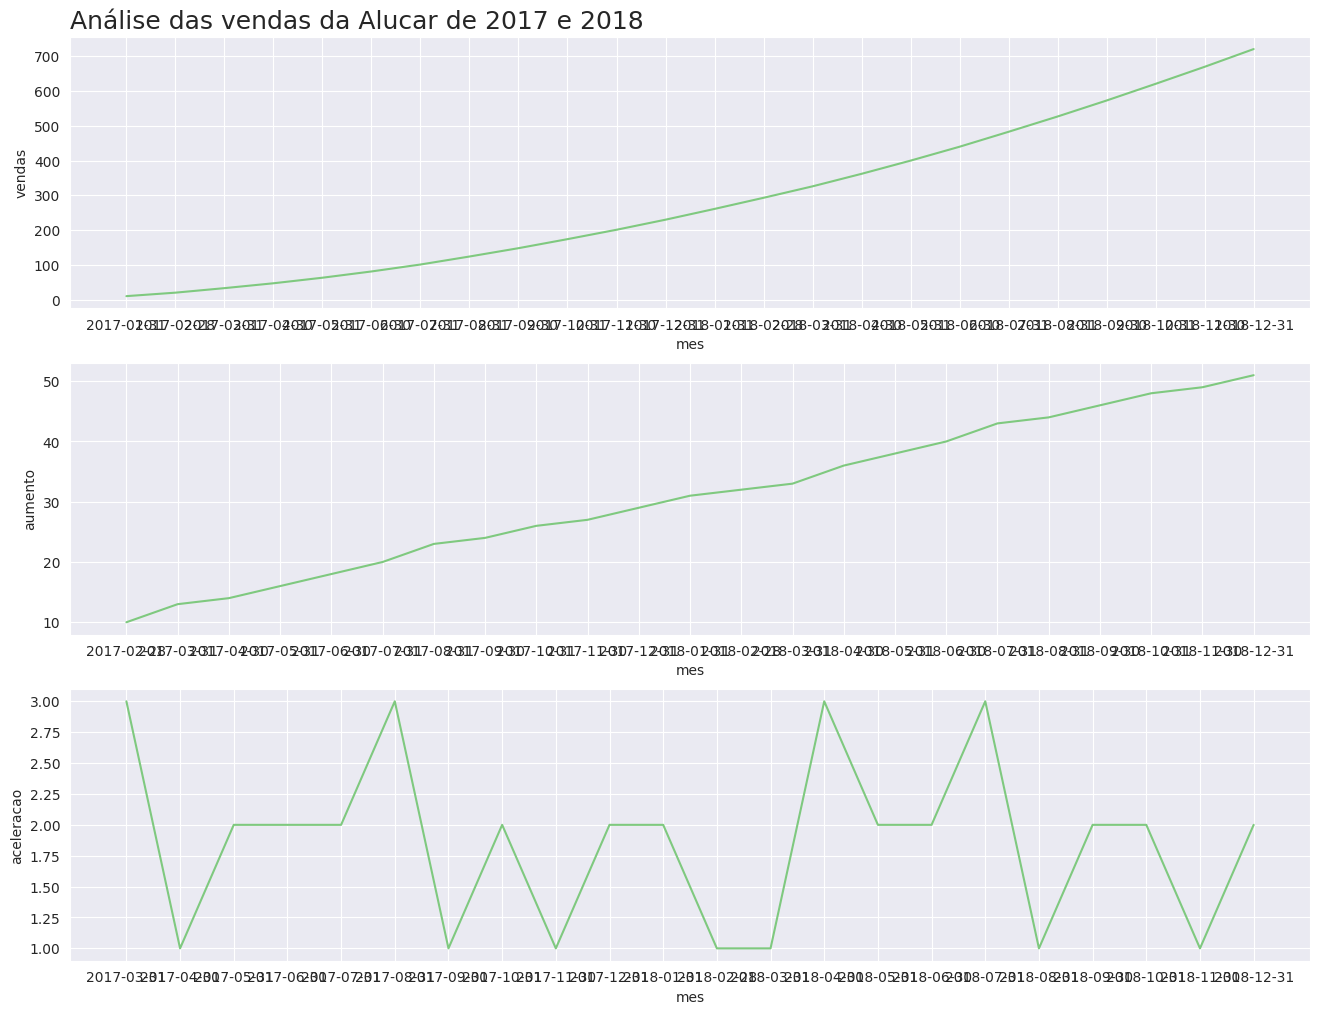

In [20]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
                alucar, 'Análise das vendas da Alucar de 2017 e 2018')

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

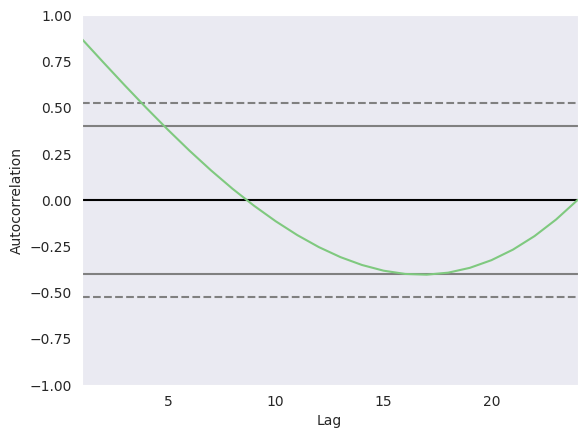

In [25]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(alucar['vendas'])


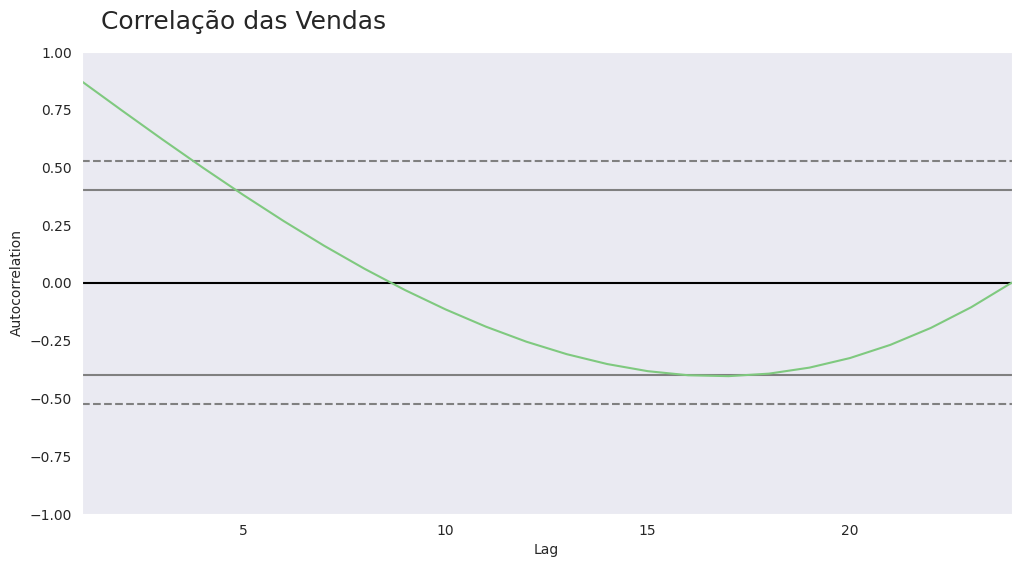

In [27]:

ax = plt.figure(figsize=(12,6)) #tamanho
ax.suptitle('Correlação das Vendas', fontsize=18, x=0.26, y=0.95) #titulo
autocorrelation_plot(alucar['vendas'])
ax=ax #retirar o texto de cima

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

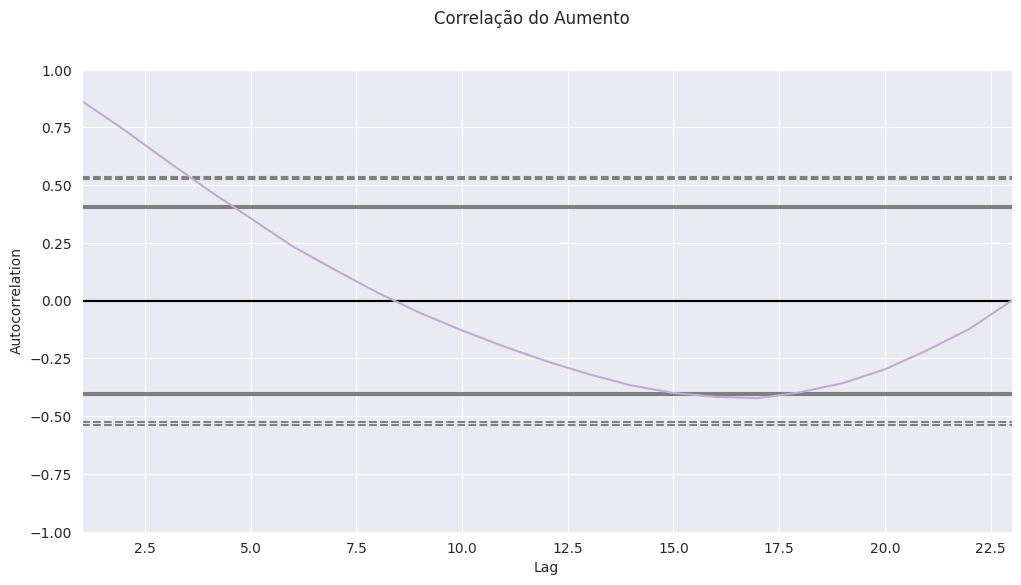

In [29]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento')
autocorrelation_plot(alucar['aumento'])
ax=ax
autocorrelation_plot(alucar['aumento'][1:]) #indice

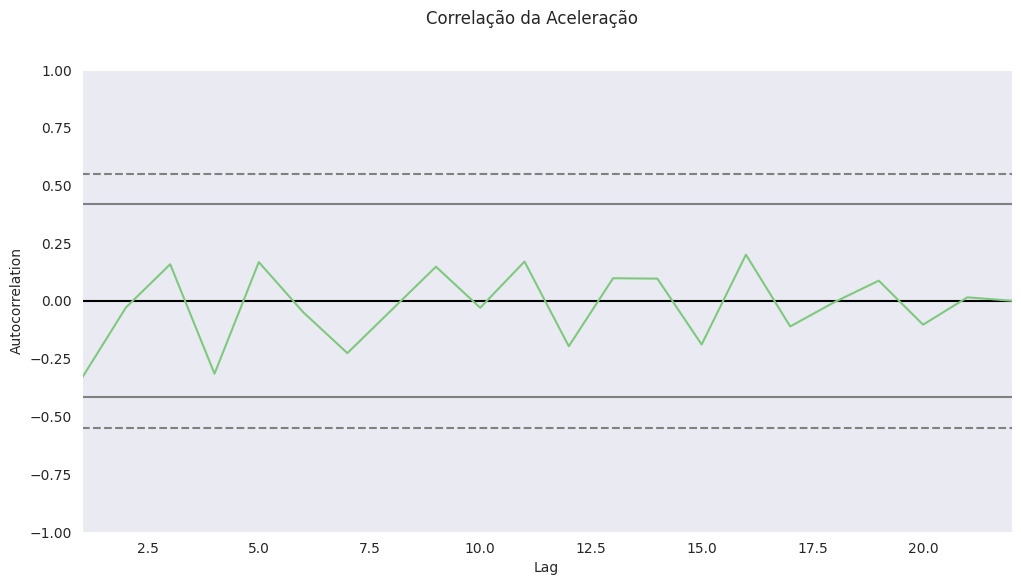

In [31]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da Aceleração')
autocorrelation_plot(alucar['aceleracao'][2:])
ax=ax


#Análise da Newsletter

In [3]:
import pandas as pd
assinantes = pd.read_csv('newsletter_alucar[1].csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [4]:
print('Quantidade de linhas e colunas', assinantes.shape)
print('Quantidade de dados nulos', assinantes.isna().sum().sum())

Quantidade de linhas e colunas (24, 2)
Quantidade de dados nulos 0


In [5]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

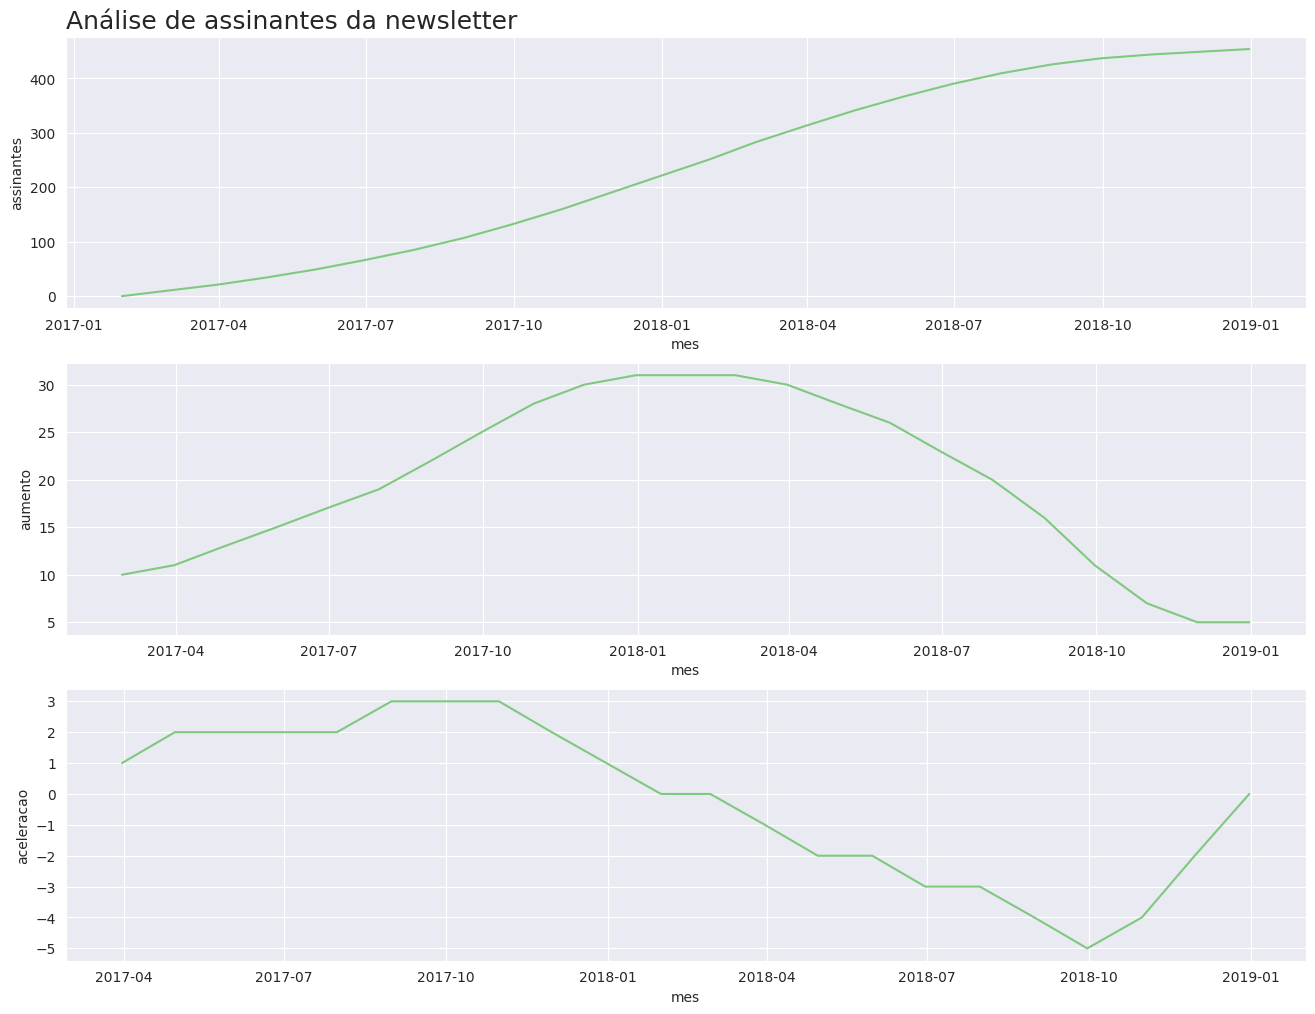

In [22]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes['aumento']= assinantes ['assinantes'].diff()
assinantes['aceleracao']= assinantes ['aumento'].diff()
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')


#Chocolura - Vendas

In [13]:
chocolura = pd. read_csv('chocolura[1].csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [29]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes
print ('Quantidade de linhas:', chocolura.shape)
print ('Quantidade de dados nulos:', chocolura.isna().sum().sum())
chocolura['aumento']= chocolura ['vendas'].diff()
chocolura['aceleracao']= chocolura ['aumento'].diff()
chocolura.head()

Quantidade de linhas: (24, 4)
Quantidade de dados nulos: 3


,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


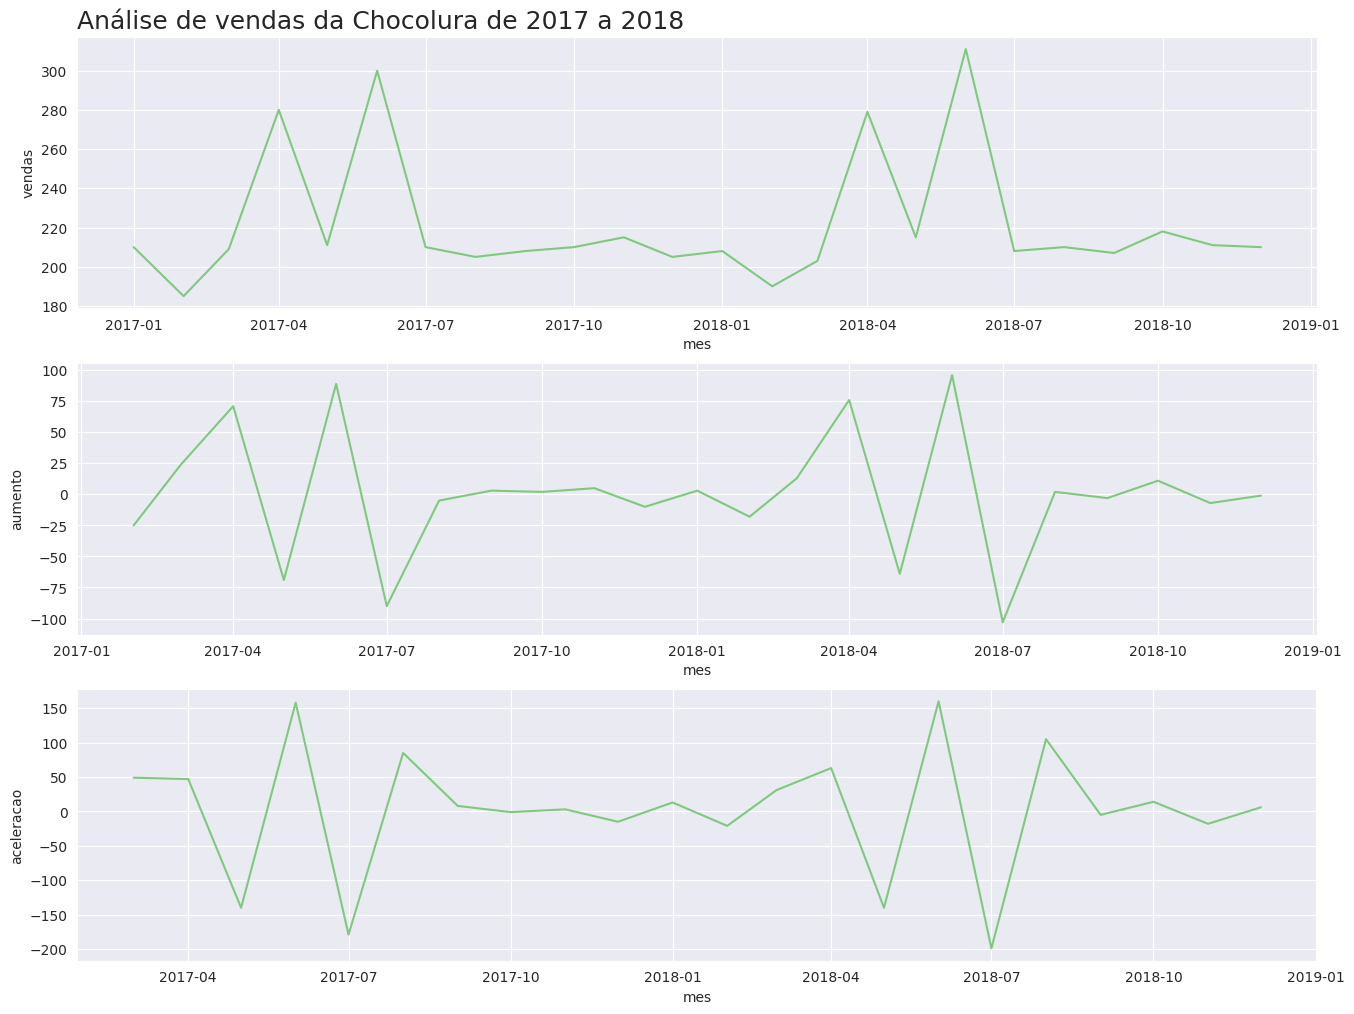

In [30]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da Chocolura de 2017 a 2018')

#Chocolura - Vendas Diárias

In [35]:
vendas_por_dia = pd. read_csv('vendas_por_dia[1].csv')
print ('Quantidade de linhas:',vendas_por_dia.shape)
print ('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia['aumento']= vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao']= vendas_por_dia ['aumento'].diff()
vendas_por_dia.head()

Quantidade de linhas: (61, 2)
Quantidade de dados nulos: 0


,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


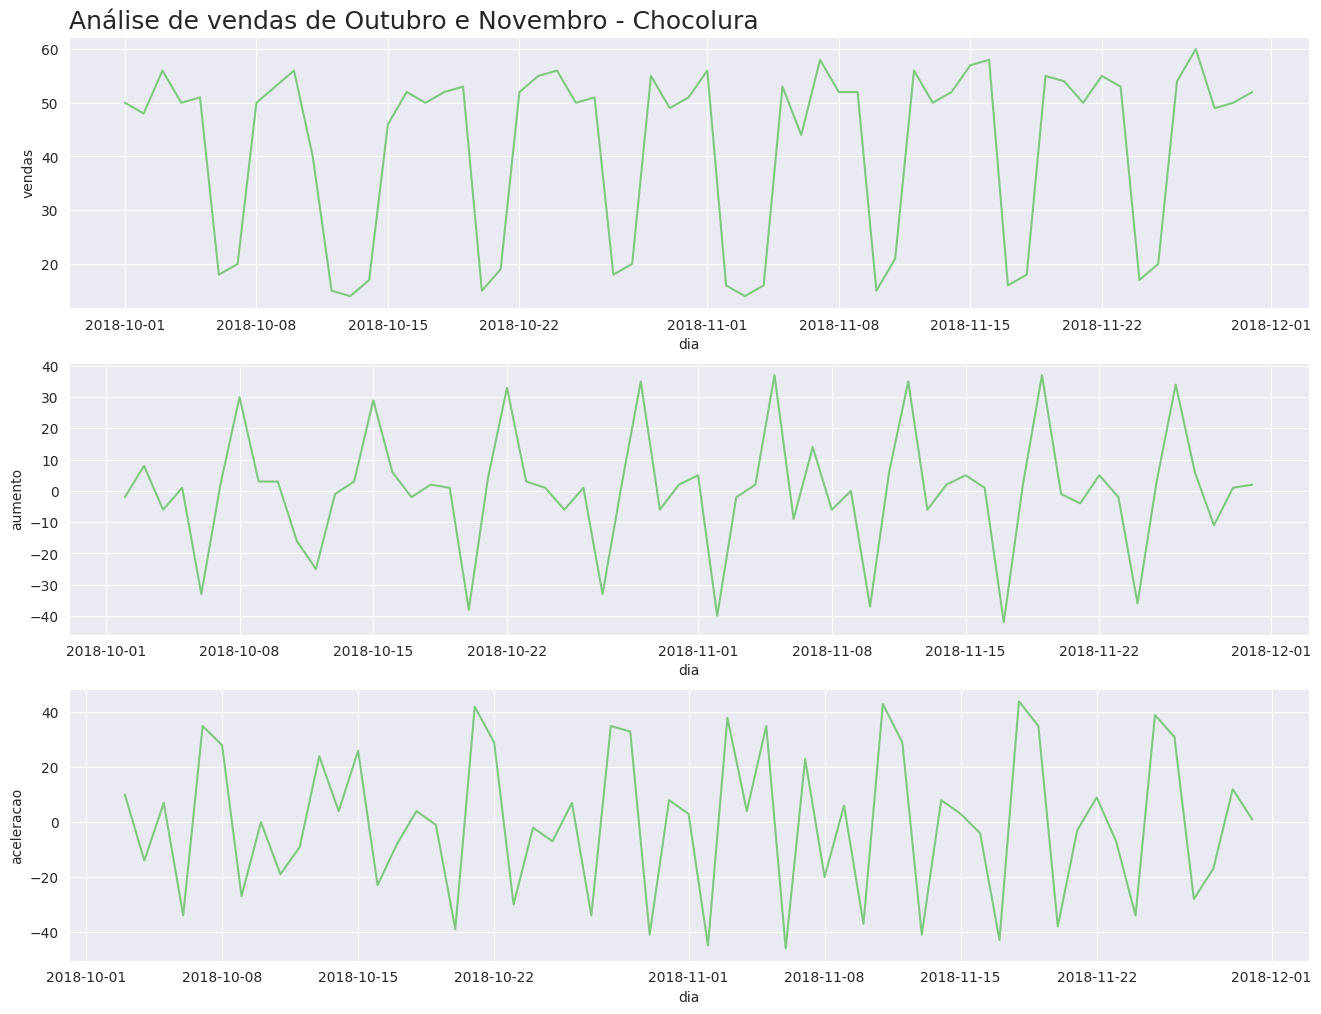

In [36]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas de Outubro e Novembro - Chocolura')

#Analisando a Sazonalidade

In [40]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia ['dia'].dt.day_name
vendas_por_dia['dia_da_semana'].unique()
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,<bound method PandasDelegate._add_delegate_acc...
1,2018-10-02,48,-2.0,NaN,<bound method PandasDelegate._add_delegate_acc...
2,2018-10-03,56,8.0,10.0,<bound method PandasDelegate._add_delegate_acc...
3,2018-10-04,50,-6.0,-14.0,<bound method PandasDelegate._add_delegate_acc...
4,2018-10-05,51,1.0,7.0,<bound method PandasDelegate._add_delegate_acc...
5,2018-10-06,18,-33.0,-34.0,<bound method PandasDelegate._add_delegate_acc...
6,2018-10-07,20,2.0,35.0,<bound method PandasDelegate._add_delegate_acc...


#Cafelura - Análise de vendas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


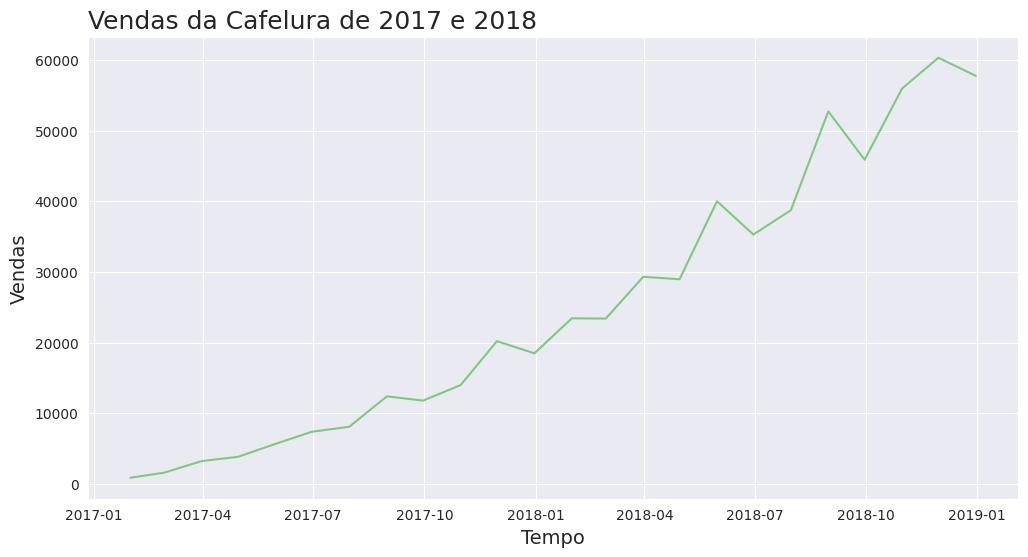

In [7]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

#definindo função plotar
def plotar (titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

import pandas as pd
cafelura = pd.read_csv('cafelura[1].csv')
cafelura.head()
cafelura['mes']= pd.to_datetime(cafelura['mes'])
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

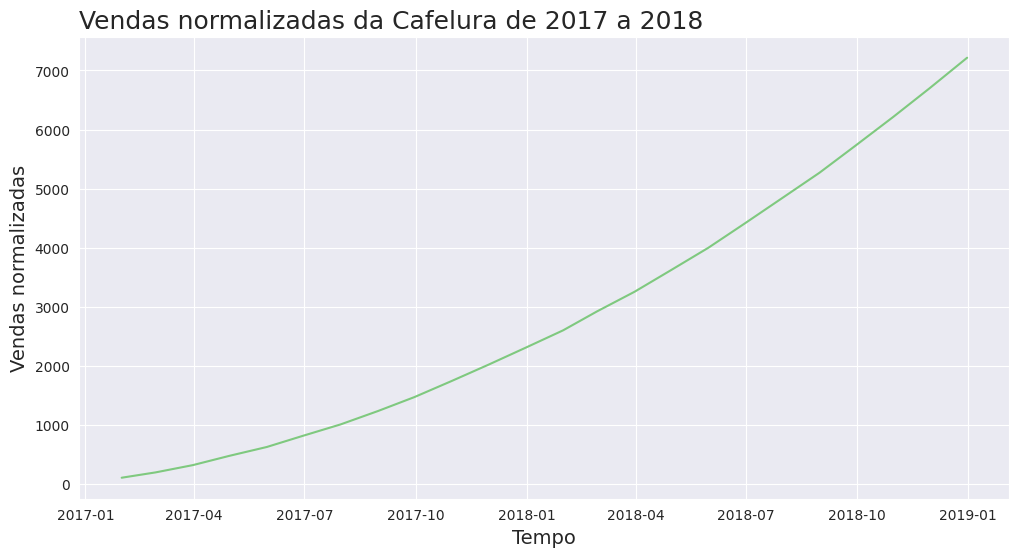

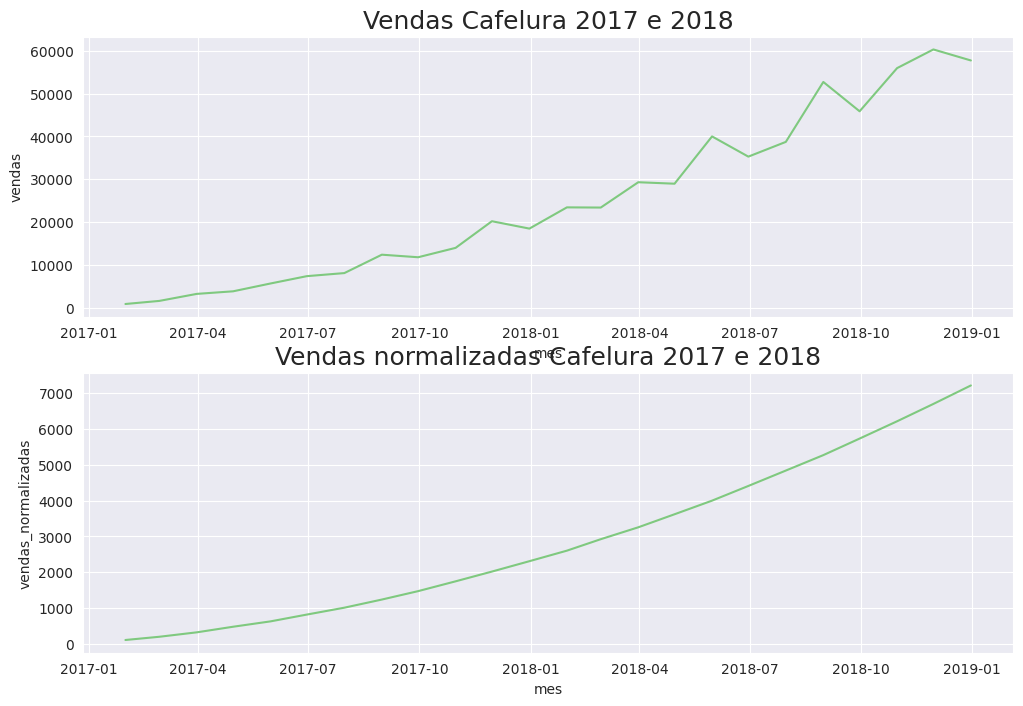

In [10]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana[1].csv')
cafelura['vendas_normalizadas']= cafelura['vendas']/quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head
plotar('Vendas normalizadas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)
plt.figure(figsize=(12,8))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax

#Statsmodel

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultado = seasonal_decompose(chocolura['vendas'],  freq=1)
ax = resultado.plot()

TypeError: ignored

#Alucel - Ruído

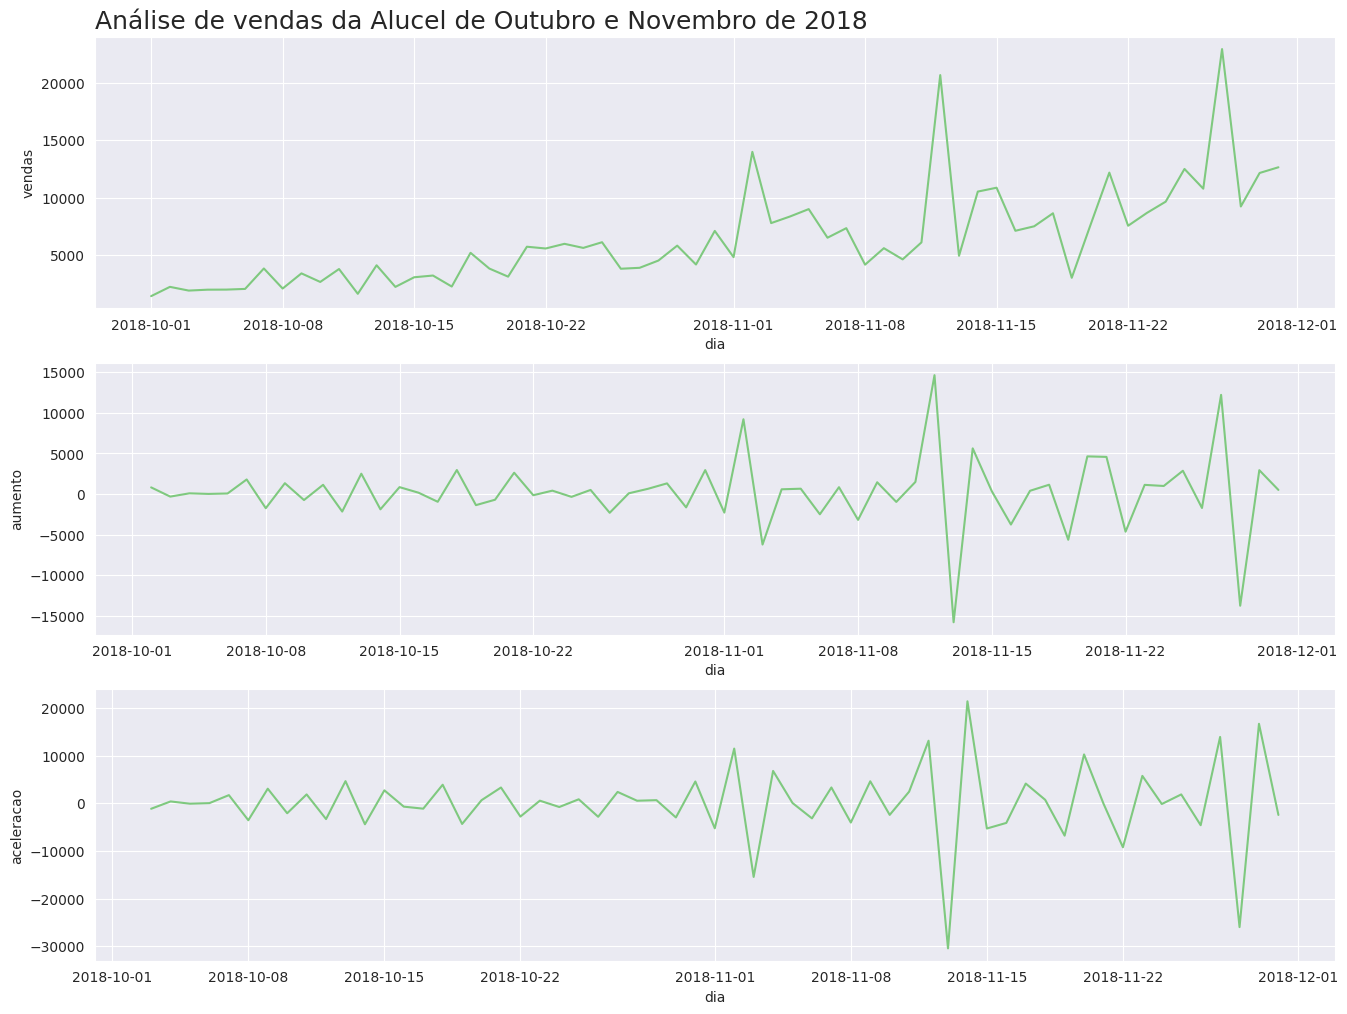

In [19]:
alucel = pd.read_csv('alucel[1].csv')
alucel.head()
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes
alucel ['aumento'] = alucel ['vendas'].diff()
alucel ['aceleracao'] = alucel ['aumento'].diff()


def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

#Média Móvel

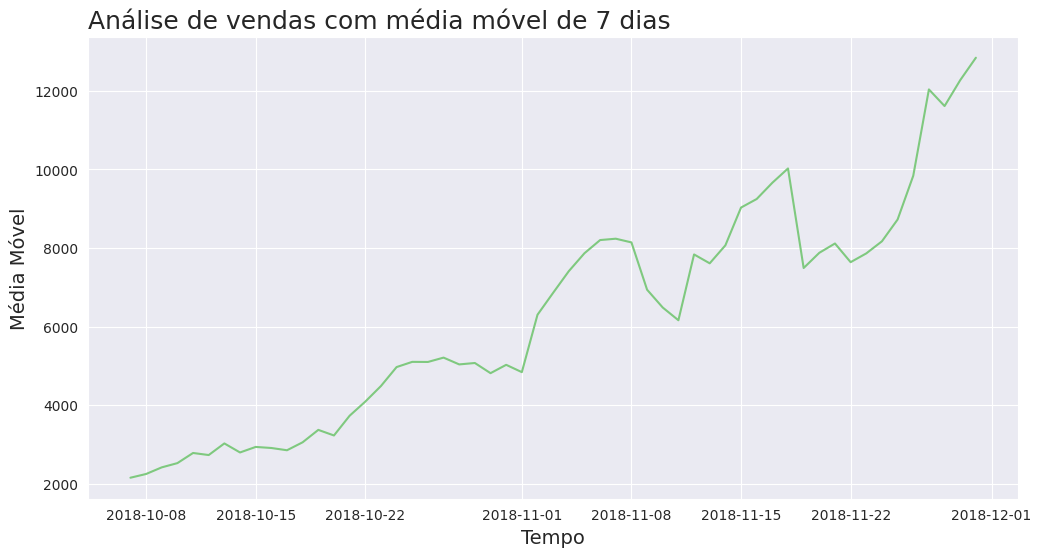

In [21]:
#função pandas para cálculo -rolling
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

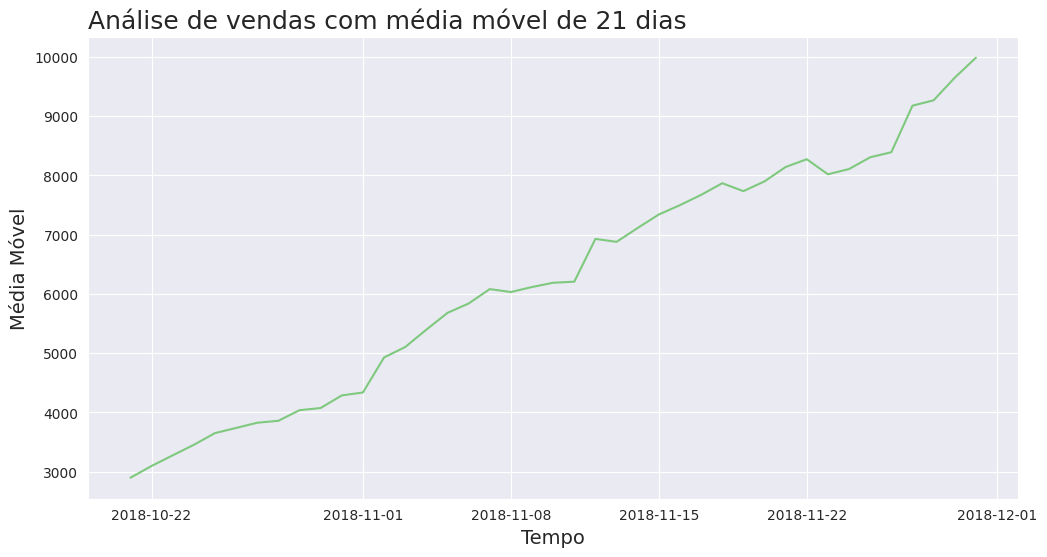

In [22]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

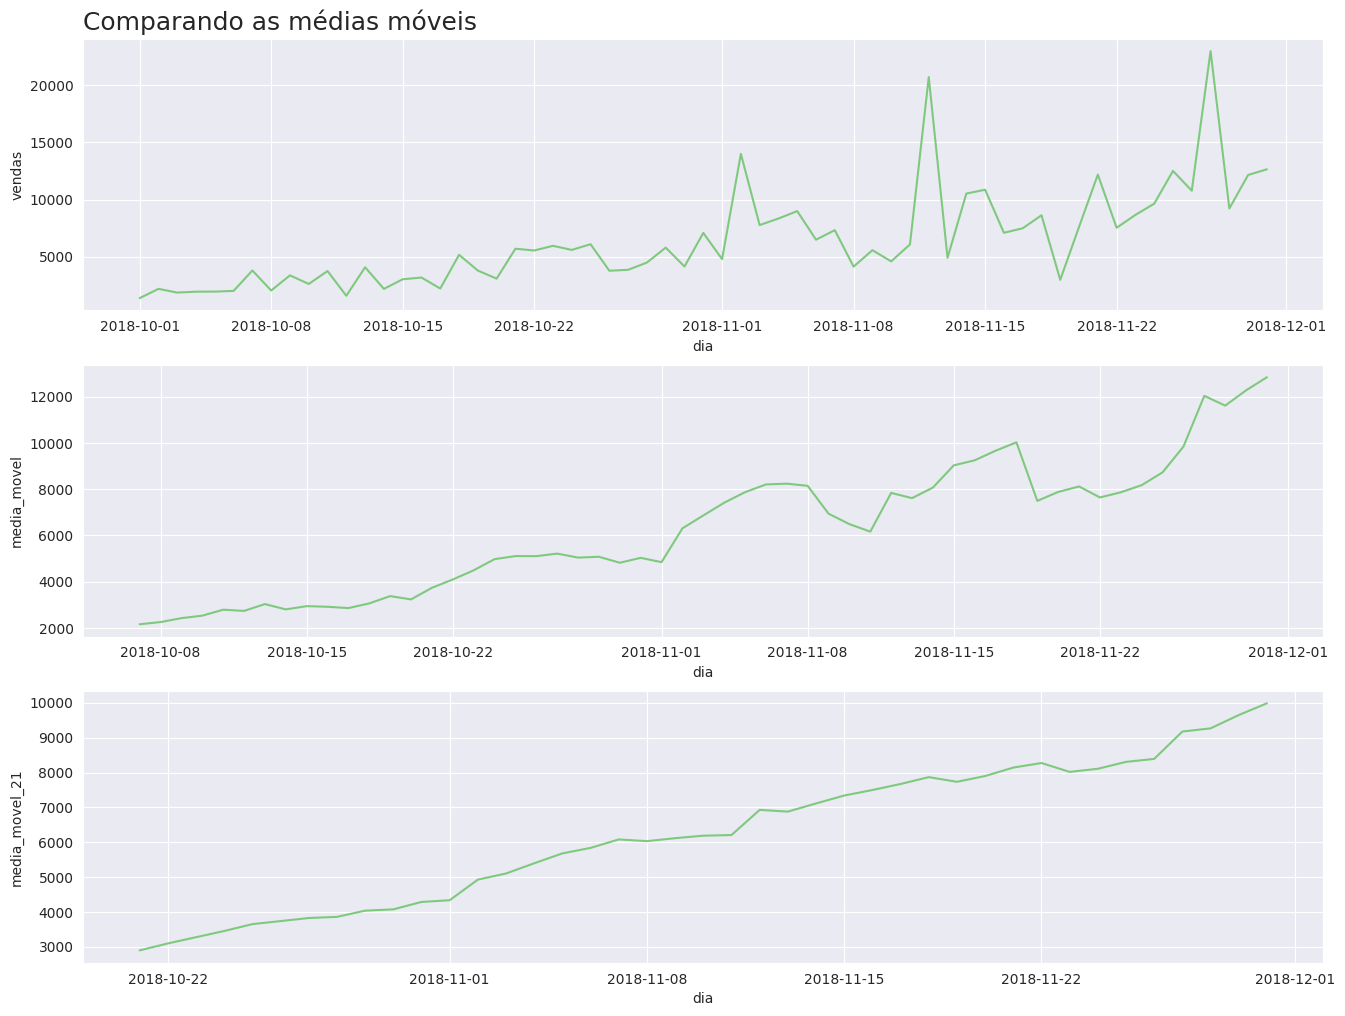

In [23]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as médias móveis')